# Electric Vehicle Sales by Indian States

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [20]:
db = pd.read_csv(r"C:\Users\RAJESH RANJAN\Desktop\unified\Electric Vehicle Sales by State in India.csv")

In [22]:
db

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [24]:

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [26]:
# convert data type object  to datetime format.
db['Date'] = pd.to_datetime(db['Date'],format = 'mixed')     

In [28]:
db['Year'] = db['Year'].astype(int)  # convert year float to intger type

In [30]:
db.isnull().sum()


Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [32]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int32         
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  object        
 4   Vehicle_Class      96845 non-null  object        
 5   Vehicle_Category   96845 non-null  object        
 6   Vehicle_Type       96845 non-null  object        
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 5.5+ MB


In [34]:
db.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


In [18]:
db.describe()

,Year,Date,EV_Sales_Quantity
count,96845.000000,96845,96845.000000
mean,2018.622768,2019-01-28 11:00:33.641385728,37.108896
min,2014.000000,2014-01-01 00:00:00,0.000000
25%,2016.000000,2016-08-01 00:00:00,0.000000
50%,2019.000000,2019-02-01 00:00:00,0.000000
75%,2021.000000,2021-09-01 00:00:00,0.000000
max,2024.000000,2024-01-01 00:00:00,20584.000000
std,2.895581,NaN,431.566675


In [30]:
db.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


In [18]:
db['State'].unique()   # Name of States

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Andaman & Nicobar Island', 'Bihar', 'Chhattisgarh', 'Chandigarh',
       'DNH and DD', 'Delhi', 'Goa', 'Gujarat', 'Himachal Pradesh',
       'Haryana', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Maharashtra', 'Meghalaya', 'Madhya Pradesh', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Puducherry', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttarakhand', 'Uttar Pradesh',
       'West Bengal', 'Jammu and Kashmir', 'Manipur'], dtype=object)

In [20]:
len(db['State'].unique())  # no of state in column

34

In [30]:
check_duplicated = db.duplicated().sum()
print(check_duplicated)

0


In [36]:
db['Year'].value_counts().reset_index()

,Year,count
0,2019,10315
1,2023,10279
2,2018,10225
3,2022,10021
4,2017,9799
5,2016,9348
6,2021,9249
7,2015,9052
8,2014,9022
9,2020,8675


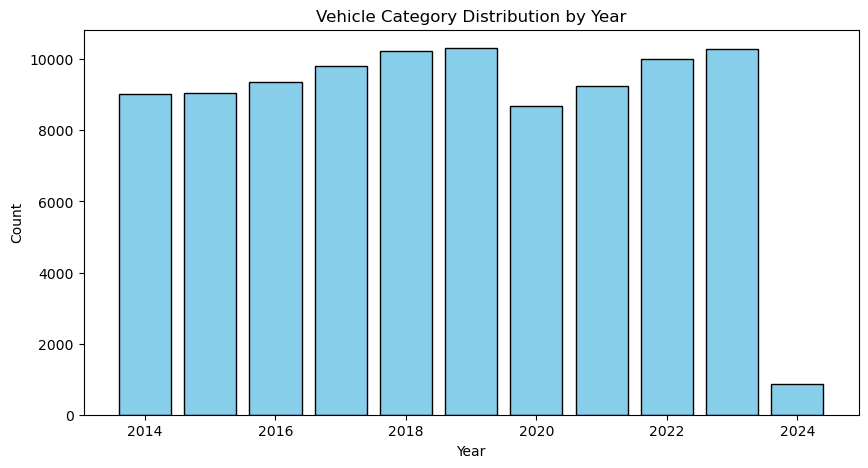

In [38]:
# year wise sales
plt.figure(figsize=(10,5))
year_wise = db['Year'].value_counts()
plt.bar(x=year_wise.index, height=year_wise.values, color='skyblue', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Vehicle Category Distribution by Year")
plt.show()

In [22]:
db['State'].value_counts().reset_index()

,State,count
0,Maharashtra,4912
1,Karnataka,4830
2,Uttar Pradesh,4557
3,Rajasthan,4552
4,Gujarat,4517
5,West Bengal,4196
6,Tamil Nadu,4063
7,Odisha,4027
8,Haryana,3842
9,Kerala,3666


In [38]:
# count types of vehicle category 
db['Vehicle_Category'].value_counts().reset_index()

,Vehicle_Category,count
0,Others,54423
1,2-Wheelers,13121
2,3-Wheelers,11491
3,Bus,9119
4,4-Wheelers,8691


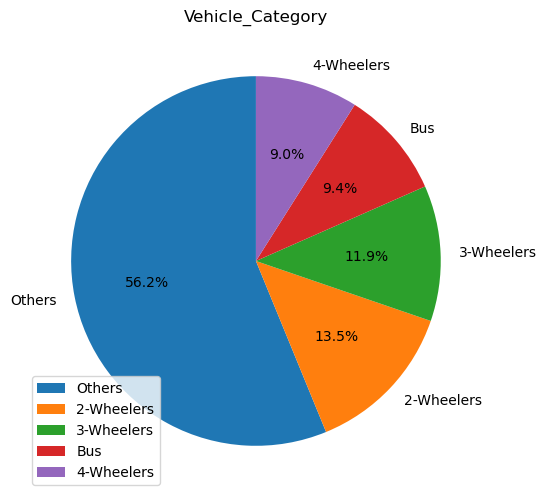

In [46]:
# to show the percentage of vehicle category
vehicle_Category = db['Vehicle_Category'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(db['Vehicle_Category'].value_counts(),autopct='%1.1f%%',startangle=90,labels=vehicle_Category.index)
plt.title("Vehicle_Category")
plt.legend()
plt.show()

In [40]:
# type of vehicle count
db['Vehicle_Type'].value_counts().reset_index()

,Vehicle_Type,count
0,Others,54423
1,2W_Personal,11700
2,Bus,7026
3,4W_Shared,4580
4,4W_Personal,4111
5,3W_Shared,3786
6,3W_Goods,3208
7,Institution Bus,2093
8,3W_Shared_LowSpeed,1951
9,3W_Goods_LowSpeed,1517


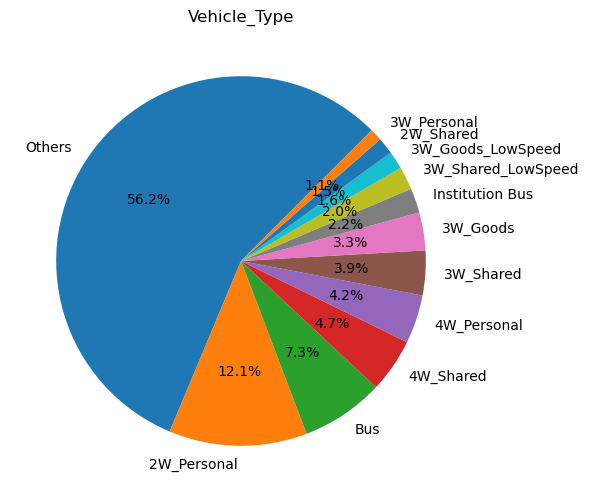

In [42]:
vehicle_Type = db['Vehicle_Type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(db['Vehicle_Type'].value_counts(),autopct='%1.1f%%',startangle=45,labels=vehicle_Type.index)
plt.title("Vehicle_Type")
# plt.legend()
plt.show()

In [28]:
db['Vehicle_Class'].value_counts().reset_index()

,Vehicle_Class,count
0,MOTOR CAR,4111
1,M-CYCLE/SCOOTER,4101
2,GOODS CARRIER,4096
3,MOTOR CAB,3985
4,BUS,3813
...,...,...
68,SEMI-TRAILER (COMMERCIAL),18
69,X-RAY VAN,12
70,MOTOR CYCLE/SCOOTER-WITH TRAILER,9
71,MODULAR HYDRAULIC TRAILER,3


In [108]:
# to show only 2 wheelers type vehicle category.
db[db['Vehicle_Category']=="2-Wheelers"]

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
13,2014,jan,2014-01-01,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1.0
35,2014,jan,2014-01-01,Arunachal Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,0.0
36,2014,jan,2014-01-01,Arunachal Pradesh,MOPED,2-Wheelers,2W_Personal,0.0
54,2014,jan,2014-01-01,Assam,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,0.0
55,2014,jan,2014-01-01,Assam,MOPED,2-Wheelers,2W_Personal,0.0
...,...,...,...,...,...,...,...,...
96826,2023,dec,2023-12-01,Goa,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,799.0
96830,2023,dec,2023-12-01,Goa,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,0.0
96837,2023,dec,2023-12-01,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,2.0
96838,2023,dec,2023-12-01,Andaman & Nicobar Island,MOPED,2-Wheelers,2W_Personal,0.0


In [110]:
two_wheelers =db[db['Vehicle_Category']=="2-Wheelers"]
two_wheelers

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
13,2014,jan,2014-01-01,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1.0
35,2014,jan,2014-01-01,Arunachal Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,0.0
36,2014,jan,2014-01-01,Arunachal Pradesh,MOPED,2-Wheelers,2W_Personal,0.0
54,2014,jan,2014-01-01,Assam,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,0.0
55,2014,jan,2014-01-01,Assam,MOPED,2-Wheelers,2W_Personal,0.0
...,...,...,...,...,...,...,...,...
96826,2023,dec,2023-12-01,Goa,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,799.0
96830,2023,dec,2023-12-01,Goa,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,0.0
96837,2023,dec,2023-12-01,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,2.0
96838,2023,dec,2023-12-01,Andaman & Nicobar Island,MOPED,2-Wheelers,2W_Personal,0.0


In [38]:
# to show year by sales 2 wheelers vehicle
agrr_2_wheelers = two_wheelers.groupby('Year')['Vehicle_Category'].value_counts().reset_index(name='Count')
agrr_2_wheelers 

,Year,Vehicle_Category,Count
0,2014,2-Wheelers,1083
1,2015,2-Wheelers,1108
2,2016,2-Wheelers,1207
3,2017,2-Wheelers,1325
4,2018,2-Wheelers,1423
5,2019,2-Wheelers,1418
6,2020,2-Wheelers,1296
7,2021,2-Wheelers,1325
8,2022,2-Wheelers,1402
9,2023,2-Wheelers,1415


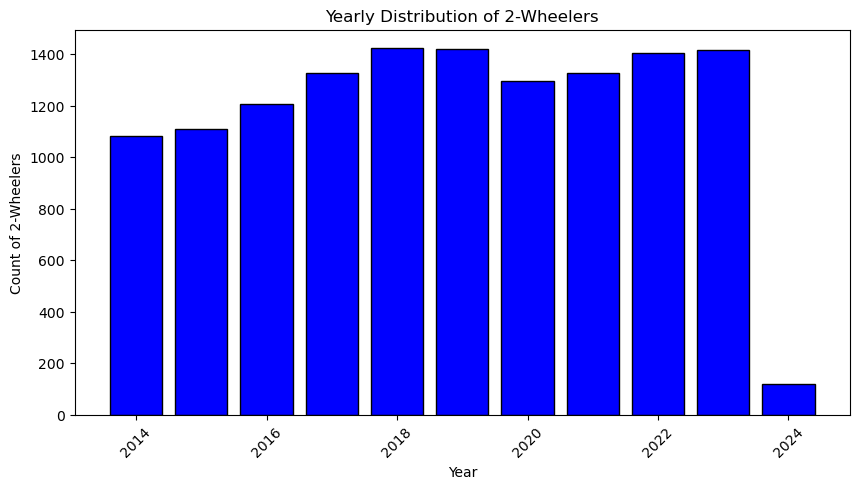

In [116]:
agrr_2_wheelers = agrr_2_wheelers.sort_values('Year')
plt.figure(figsize=(10, 5))
plt.bar(agrr_2_wheelers['Year'], agrr_2_wheelers['Count'], color='blue', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Count of 2-Wheelers")
plt.title("Yearly Distribution of 2-Wheelers")
plt.xticks(rotation=45)
plt.show()

In [126]:
# to show 3 wheelers vehicle category.
three_wheelers =db[db['Vehicle_Category']=="3-Wheelers"]
three_wheelers

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
19,2014,jan,2014-01-01,Andhra Pradesh,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0
39,2014,jan,2014-01-01,Arunachal Pradesh,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0
40,2014,jan,2014-01-01,Arunachal Pradesh,THREE WHEELER (PERSONAL),3-Wheelers,3W_Personal,0.0
58,2014,jan,2014-01-01,Assam,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
59,2014,jan,2014-01-01,Assam,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0
...,...,...,...,...,...,...,...,...
96831,2023,dec,2023-12-01,Goa,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96832,2023,dec,2023-12-01,Goa,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,2.0
96833,2023,dec,2023-12-01,Goa,THREE WHEELER (PERSONAL),3-Wheelers,3W_Personal,1.0
96843,2023,dec,2023-12-01,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [128]:
agrr_3_wheelers = three_wheelers.groupby('Year')['Vehicle_Category'].value_counts().reset_index(name='Count')
agrr_3_wheelers 

,Year,Vehicle_Category,Count
0,2014,3-Wheelers,828
1,2015,3-Wheelers,858
2,2016,3-Wheelers,966
3,2017,3-Wheelers,1118
4,2018,3-Wheelers,1214
5,2019,3-Wheelers,1267
6,2020,3-Wheelers,1160
7,2021,3-Wheelers,1257
8,2022,3-Wheelers,1349
9,2023,3-Wheelers,1359


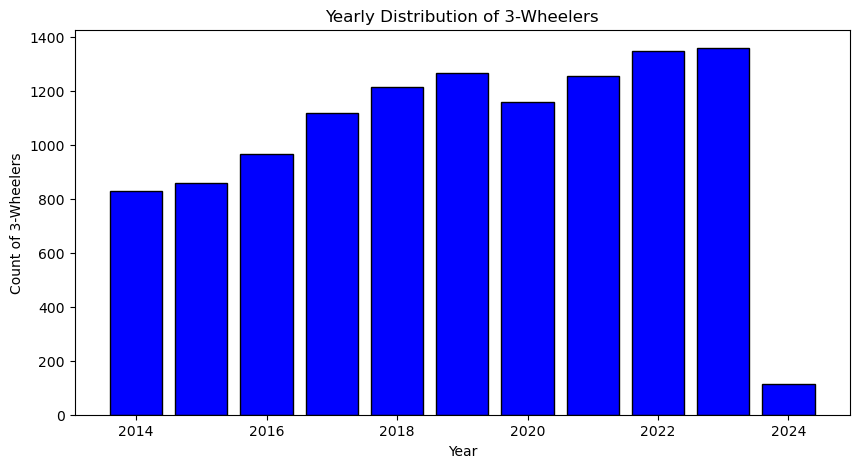

In [132]:
agrr_3_wheelers = agrr_3_wheelers.sort_values('Year')
plt.figure(figsize=(10, 5))
plt.bar(agrr_3_wheelers['Year'], agrr_3_wheelers['Count'], color='blue', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Count of 3-Wheelers")
plt.title("Yearly Distribution of 3-Wheelers")
plt.xticks(rotation=0)
plt.show()

In [29]:
# to show 4 wheelers type vehicle category.
four_wheelers =db[db['Vehicle_Category']=="4-Wheelers"]
four_wheelers

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
14,2014,jan,2014-01-01,Andhra Pradesh,MOTOR CAB,4-Wheelers,4W_Shared,0.0
15,2014,jan,2014-01-01,Andhra Pradesh,MOTOR CAR,4-Wheelers,4W_Personal,0.0
37,2014,jan,2014-01-01,Arunachal Pradesh,MOTOR CAB,4-Wheelers,4W_Shared,0.0
38,2014,jan,2014-01-01,Arunachal Pradesh,MOTOR CAR,4-Wheelers,4W_Personal,0.0
56,2014,jan,2014-01-01,Assam,MOTOR CAB,4-Wheelers,4W_Shared,0.0
...,...,...,...,...,...,...,...,...
96816,2023,dec,2023-12-01,Delhi,MOTOR CAR,4-Wheelers,4W_Personal,727.0
96827,2023,dec,2023-12-01,Goa,MOTOR CAB,4-Wheelers,4W_Shared,0.0
96828,2023,dec,2023-12-01,Goa,MOTOR CAR,4-Wheelers,4W_Personal,71.0
96839,2023,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAB,4-Wheelers,4W_Shared,1.0


In [31]:
agrr_4_wheelers = four_wheelers.groupby('Year')['Vehicle_Category'].value_counts().reset_index(name='Count')
agrr_4_wheelers 

,Year,Vehicle_Category,Count
0,2014,4-Wheelers,884
1,2015,4-Wheelers,886
2,2016,4-Wheelers,857
3,2017,4-Wheelers,859
4,2018,4-Wheelers,879
5,2019,4-Wheelers,864
6,2020,4-Wheelers,821
7,2021,4-Wheelers,831
8,2022,4-Wheelers,858
9,2023,4-Wheelers,880


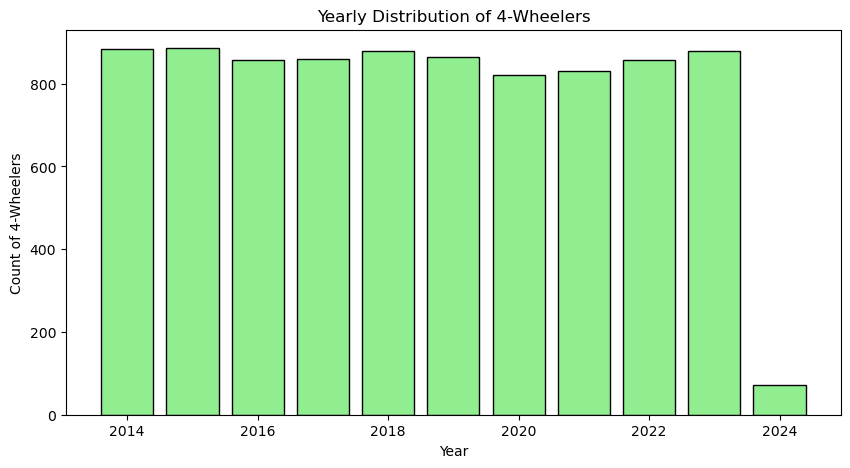

In [33]:
agrr_4_wheelers  = agrr_4_wheelers.sort_values('Year')
plt.figure(figsize=(10, 5))
plt.bar(agrr_4_wheelers['Year'], agrr_4_wheelers['Count'], color='lightgreen', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Count of 4-Wheelers")
plt.title("Yearly Distribution of 4-Wheelers")
plt.xticks(rotation=0)
plt.show()

In [54]:
# to show bus type vehicle category.
bus =db[db['Vehicle_Category']=="Bus"]
bus

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0
7,2014,jan,2014-01-01,Andhra Pradesh,EDUCATIONAL INSTITUTION BUS,Bus,Institution Bus,0.0
16,2014,jan,2014-01-01,Andhra Pradesh,OMNI BUS,Bus,Bus,0.0
26,2014,jan,2014-01-01,Arunachal Pradesh,BUS,Bus,Bus,0.0
46,2014,jan,2014-01-01,Assam,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96785,2023,dec,2023-12-01,DNH and DD,BUS,Bus,Bus,0.0
96798,2023,dec,2023-12-01,DNH and DD,OMNI BUS,Bus,Bus,0.0
96806,2023,dec,2023-12-01,Delhi,BUS,Bus,Bus,348.0
96821,2023,dec,2023-12-01,Goa,BUS,Bus,Bus,6.0


In [146]:
bus = bus.groupby('Year')['Vehicle_Category'].value_counts().reset_index(name='Count')
bus

,Year,Vehicle_Category,Count
0,2014,Bus,957
1,2015,Bus,940
2,2016,Bus,944
3,2017,Bus,974
4,2018,Bus,995
5,2019,Bus,964
6,2020,Bus,638
7,2021,Bus,703
8,2022,Bus,867
9,2023,Bus,1051


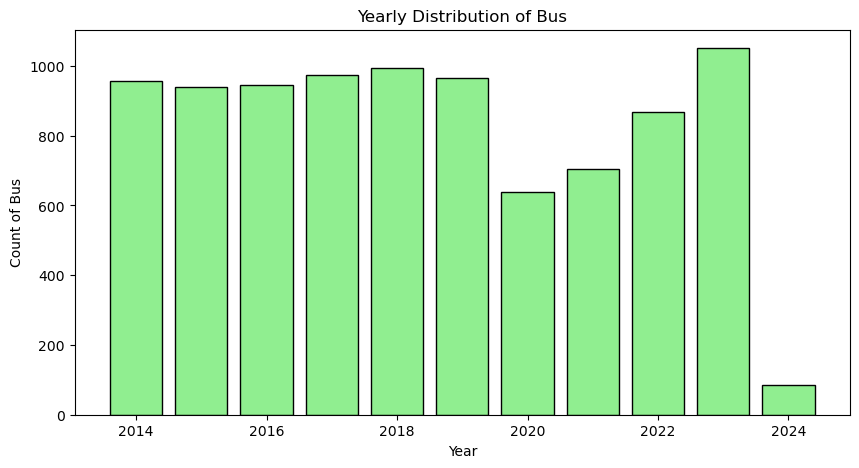

In [148]:
bus = bus.sort_values('Year')
plt.figure(figsize=(10, 5))
plt.bar(bus['Year'], bus['Count'], color='lightgreen', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Count of Bus")
plt.title("Yearly Distribution of Bus")
plt.xticks(rotation=0)
plt.show()

# State wise Details

In [42]:
statewise = pd.pivot_table(db,values =["EV_Sales_Quantity"] ,index = "State", aggfunc = max)
statewise

C:\Users\RAJESH RANJAN\AppData\Local\Temp\ipykernel_20724\2504220386.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  statewise = pd.pivot_table(db,values =["EV_Sales_Quantity"] ,index = "State", aggfunc = max)


,EV_Sales_Quantity
State,
Andaman & Nicobar Island,29.0
Andhra Pradesh,3905.0
Arunachal Pradesh,5.0
Assam,5619.0
Bihar,8032.0
Chandigarh,361.0
Chhattisgarh,3752.0
DNH and DD,24.0
Delhi,5380.0


In [44]:
statewise = statewise.sort_values(by = "EV_Sales_Quantity",ascending = False)
statewise.style.background_gradient(cmap = 'tab20')

,EV_Sales_Quantity
State,
Uttar Pradesh,20584.000000
Maharashtra,19908.000000
Karnataka,16602.000000
Tamil Nadu,9624.000000
Gujarat,8843.000000
Rajasthan,8749.000000
Bihar,8032.000000
Kerala,7383.000000
Assam,5619.000000


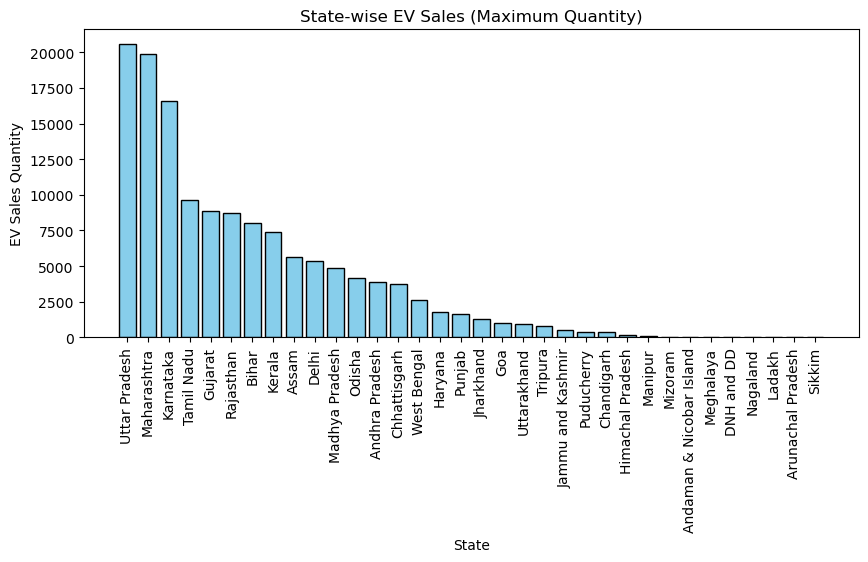

In [54]:
plt.figure(figsize=(10,4))
plt.bar(statewise.index, statewise["EV_Sales_Quantity"], color='skyblue', edgecolor='black')
plt.xlabel("State")
plt.ylabel("EV Sales Quantity")
plt.title("State-wise EV Sales (Maximum Quantity)")
plt.xticks(rotation=90)
plt.show()